In [46]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=true)

t1,t2 = symbols('\\theta_1, \\theta_2')
l1,l2 = symbols('l_1, l_2')

def dh(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

In [49]:
H = simplify(dh(l1,0,0,t1)*dh(l2,0,0,t2))
px = H[0,3]
py = H[1,3]
simplify(px**2 + py**2)

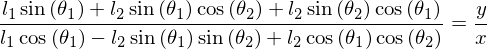

In [41]:
Eq(py/px, y/x)

In [43]:
x*py

In [44]:
y*px

### Método de Newton-Raphson

In [47]:
def newton_raphson(J,b,X0,vals,eps=0.001,icg=[t1,t2]):
    ei, k = [], 1
    Jinv = J.inv().subs(vals)
    b = b.subs(vals)
    while True:
        x = (Jinv.subs(X0)*b.subs(X0)).evalf()
        ei.append([x.norm(),X0[icg[0]],X0[icg[1]]])
        if x.norm()<eps: break
        for jj,ky in enumerate(X0):
            X0[ky] += (x[jj]).evalf()
        k += 1
    return X0,x,k,ei

In [67]:
xp,yp = 2,2
f1 = px - xp
f2 = py - yp

F = Matrix([f1,f2])
J = F.jacobian([t1,t2])
b = -F

vals = {l1:3,l2:2}
X0 = {t1:pi/3,t2:pi/6}
sol,*_ = newton_raphson(J,b,X0,vals, eps=1e-8)

In [68]:
(sol[t1]*180/pi).evalf(), (sol[t2]*180/pi).evalf()

In [70]:
solve?

In [73]:
def suma(a,b):
    """ 
    Funcispá´psia so S S SDS
    
    a - int,float
    b - int,float
    
    """
    return a+b